In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [5]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
# drop unnecessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
# check null values for missing columns in the dataset
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

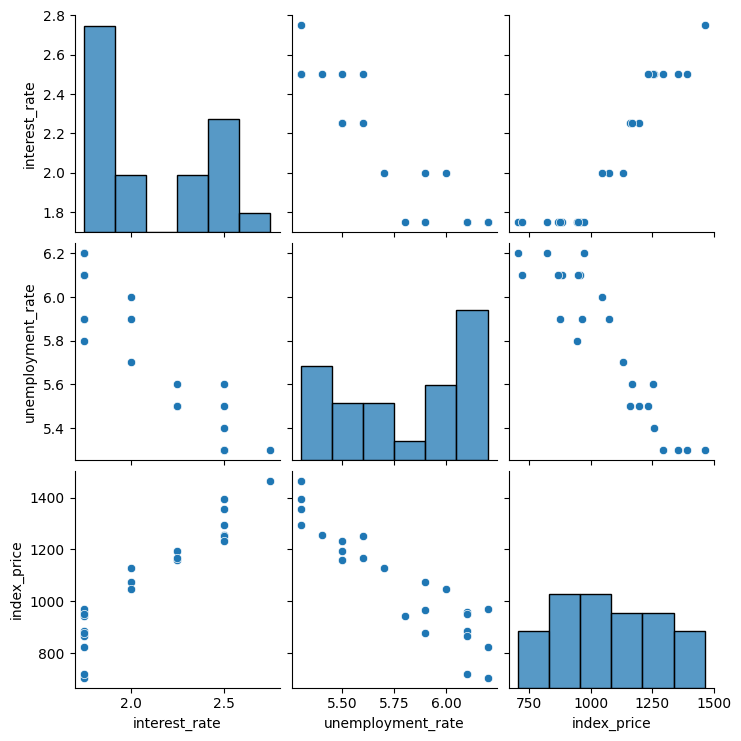

In [12]:
import seaborn as sns
sns.pairplot(df_index)

In [13]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

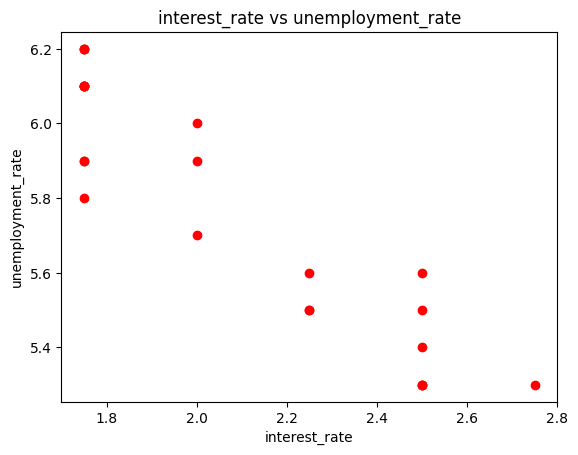

In [16]:
# visualize the dataset 
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.title('interest_rate vs unemployment_rate')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [20]:
#  independent and dependent futures
X = df_index.iloc[:, :-1].values
y = df_index.iloc[:, 1].values
X,y

(array([[2.75, 5.3 ],
        [2.5 , 5.3 ],
        [2.5 , 5.3 ],
        [2.5 , 5.3 ],
        [2.5 , 5.4 ],
        [2.5 , 5.6 ],
        [2.5 , 5.5 ],
        [2.25, 5.5 ],
        [2.25, 5.5 ],
        [2.25, 5.6 ],
        [2.  , 5.7 ],
        [2.  , 5.9 ],
        [2.  , 6.  ],
        [1.75, 5.9 ],
        [1.75, 5.8 ],
        [1.75, 6.1 ],
        [1.75, 6.2 ],
        [1.75, 6.1 ],
        [1.75, 6.1 ],
        [1.75, 6.1 ],
        [1.75, 5.9 ],
        [1.75, 6.2 ],
        [1.75, 6.2 ],
        [1.75, 6.1 ]]),
 array([5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6. ,
        5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1]))

In [21]:
# train text split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
import seaborn as sns
sns.regplot(df_index['interest_rate'],df_index['index_price'])


ValueError: need at least one array to concatenate

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [34]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [35]:
regression.fit(X_train,y_train)


LinearRegression()

In [36]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

array([-0.00000000e+00, -0.00000000e+00, -7.88860905e-31])

In [41]:
# do prediction using the 
y_pred = regression.predict(X_test)

In [42]:
y_pred

array([5.5, 6.2, 5.3, 6.1, 5.9, 5.6])

In [43]:
# performannce matrix 
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))

Mean Squared Error:  0.0
Mean Absolute Error:  0.0
